## ECSE 415 - Intro. To Computer Vision
## Tutorial 8 - Face Detection

A classifier decides whether a given input image is a positive image (i.e. face image) or a negative image (i.e. non-face image). Classifiers are trained on hundred of thousands of positive and negative images to learn how to classify unseen images correctly.
OpenCV provides us with two pre-trained classifiers for face detection:
    - Haar Classifier
    - LPB Classifier

## Haar Detector
Haar classifier is a machine learning based approach created by Paul Viola and Michael Jones. It is trained on many positive and negative images and starts by extracting Haar features from each training image.

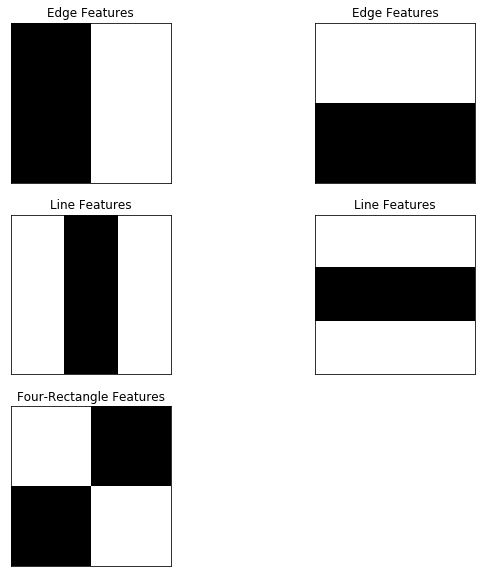

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

""" Edge Haar Features """
def edge_features(size):
    """
    Create Haar edge features.
    
    @param size: size of Haar filter
                    @pre even integer >= 2
    
    @return list of edge Haar filters
    """
    edge1 = np.zeros((size, size))
    edge2 = np.zeros((size, size))
    idx = int(size/2)
    edge1[:, idx:] = 1
    edge2[:idx, :] = 1
    return edge1, edge2

""" Line Haar Features """
def line_features(size):
    """
    Create Haar line features.
    
    @param size: size of Haar filter
                    @pre integer multiple of 3 & >= 3
    
    @return list of line Haar filters
    """
    line1 = np.zeros((size, size))
    line2 = np.zeros((size, size))
    idx = int(size/3)
    line1[:, :idx] = 1
    line1[:, -idx:] = 1
    line2[:idx, :] = 1
    line2[-idx:, :] = 1
    return line1, line2

""" Four-Rectangle Features """
def four_rect_features(size):
    """
    Create Haar four-rectangle features.
    
    @param size: size of Haar filter
                    @pre even integer & >= 2
    
    @return four-rectangle feature
    """
    rect = np.zeros((size, size))
    idx = int(size/2)
    rect[:idx, :idx]  = 1
    rect[-idx:, -idx:] = 1
    return rect

# demonstrate Haar filters
e1, e2 = edge_features(2)
l1, l2 = line_features(3)
rt = four_rect_features(2)

# display filters
plt.figure(figsize=(10,10))
plt.subplot(321), plt.imshow(e1, cmap='gray')
plt.title('Edge Features'), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(e2, cmap='gray')
plt.title('Edge Features'), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(l1, cmap='gray')
plt.title('Line Features'), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(l2, cmap='gray')
plt.title('Line Features'), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(rt, cmap='gray')
plt.title('Four-Rectangle Features'), plt.xticks([]), plt.yticks([])
plt.show()

Each window is placed on the picture to calculate a single feature. This feature is obtained by subtracting the sum of pixels under the white portion of the window from the sum of pixels under the black portion. All possible sizes of each window are placed on all possible locations of each image.
However, out of all of these features most are irrelevant. We can remove irrelevant features while keeping only those that are relevant by using a technique called Adaboost.
Adaboost is a training process for face detection which selects only those features known to improve the classification (face/non-face) accuracy of our classifier.

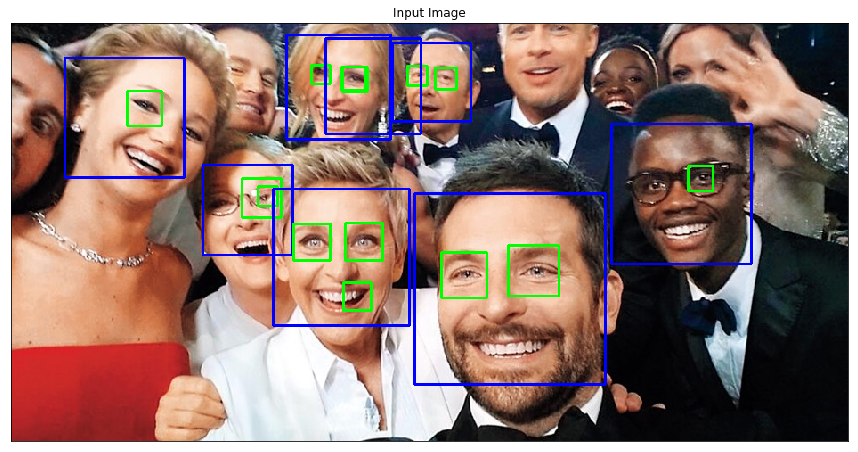

In [3]:
#########################
# FACE AND EYE DETECTOR #
#########################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Get OpenCV datapath
data_path = cv2.data.haarcascades
face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_eye.xml'))

img = cv2.imread('selfie.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces
# detectMultiScape(image, scaleFactor, minNeighbors)
# scaleFactor - parameter specifying how much the image size is reduced
#  at each image scale
# minNeighbors - parameter specifying how many neighbors each candidate
#  rectangle should have to retain
faces = face_cascade.detectMultiScale(img_gray, 1.1,2)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 2)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

# display images
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.show()

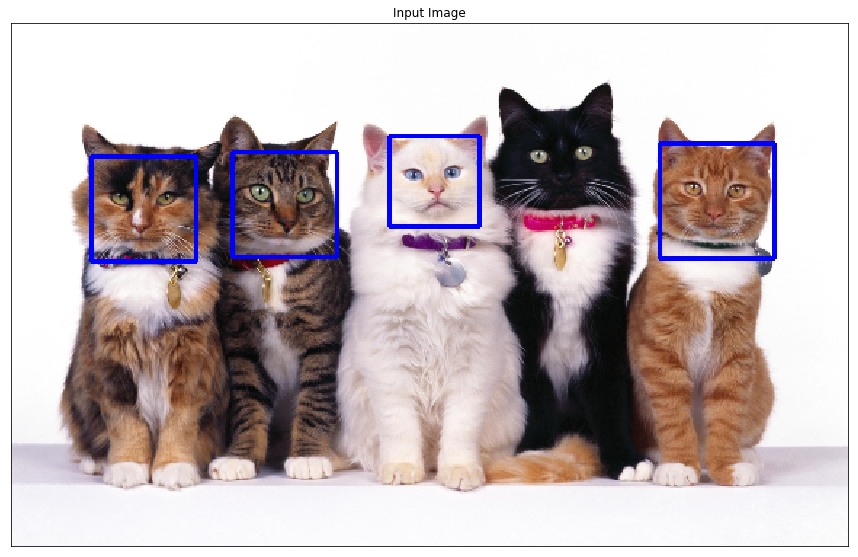

In [4]:
#####################
# CAT FACE DETECTOR #
#####################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

data_path = cv2.data.haarcascades
cat_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_frontalcatface.xml'))

img = cv2.imread('cats.jpg')
img = cv2.resize(img, None, fx=0.3, fy=0.3)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces
# detectMultiScape(image, scaleFactor, minNeighbors)
# scaleFactor - parameter specifying how much the image size is reduced
#  at each image scale
# minNeighbors - parameter specifying how many neighbors each candidate
#  rectangle should have to retain
cat_faces = cat_cascade.detectMultiScale(img_gray, 1.1,2)
for (x,y,w,h) in cat_faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)

# display images
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.show()

## LBP Cascade Classifier

(470, 940, 3)
(470, 940)


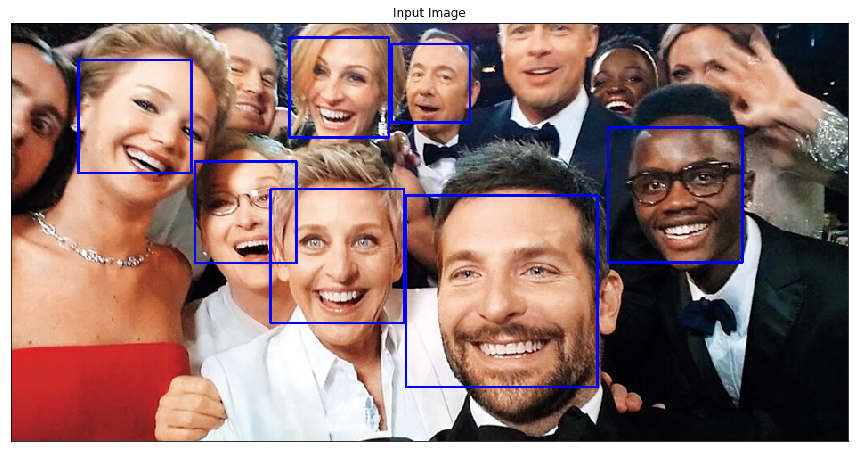

In [6]:
#####################
# FACE DETECTOR LBP #
#####################
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

data_path = cv2.data.haarcascades

# NOTE: If your environment was installed using Pip, you may be missing this file. Clone the master OpenCV
# from GiHub and copy the lbpcascades folder (opencv/lbpcascades/) into the OpenCV data folder - 
# check cv2.data.haarcascades to see where it is installed on your machine.
lbp_face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'lbpcascades', 'lbpcascade_frontalface.xml'))
lbp_face_cascade
img = cv2.imread('selfie.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# detect faces
# detectMultiScape(image, scaleFactor, minNeighbors)
# scaleFactor - parameter specifying how much the image size is reduced
#  at each image scale
# minNeighbors - parameter specifying how many neighbors each candidate
#  rectangle should have to retain
lbp_faces = lbp_face_cascade.detectMultiScale(img_gray, 1.1,2)
for (x,y,w,h) in lbp_faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)

# display images
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.show()